In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


In [21]:
df = pd.read_csv(r"DATA_SETS/iris_data.csv")
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [22]:
print(df.head())
df.columns

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [23]:
le = LabelEncoder()
df['Species_encoded'] = le.fit_transform(df['Species'])

In [24]:
df = df.drop(columns=["Species"])  
df


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


In [11]:
hc_model = AgglomerativeClustering(
    n_clusters=3,
    metric='euclidean',
    linkage='ward'
)
clusters = hc_model.fit_predict(X_scaled)


In [12]:
df["Cluster"] = clusters
print(df.head())


   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  Species_encoded  \
0           5.1          3.5           1.4          0.2                0   
1           4.9          3.0           1.4          0.2                0   
2           4.7          3.2           1.3          0.2                0   
3           4.6          3.1           1.5          0.2                0   
4           5.0          3.6           1.4          0.2                0   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


In [13]:
hc_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
df["cluster"] = hc_model.labels_
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_encoded,Cluster,cluster
0,5.1,3.5,1.4,0.2,0,1,1
1,4.9,3.0,1.4,0.2,0,1,1
2,4.7,3.2,1.3,0.2,0,1,1
3,4.6,3.1,1.5,0.2,0,1,1
4,5.0,3.6,1.4,0.2,0,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0,0
146,6.3,2.5,5.0,1.9,2,0,0
147,6.5,3.0,5.2,2.0,2,0,0
148,6.2,3.4,5.4,2.3,2,0,0


In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

x = df[['Sepal.Length', 'Petal.Length']]

z = linkage(x, method='average')
print(z)


[[0.00000000e+00 1.70000000e+01 0.00000000e+00 2.00000000e+00]
 [4.00000000e+00 4.90000000e+01 0.00000000e+00 2.00000000e+00]
 [1.20000000e+01 4.50000000e+01 0.00000000e+00 2.00000000e+00]
 [6.00000000e+00 4.70000000e+01 0.00000000e+00 2.00000000e+00]
 [5.00000000e+00 2.00000000e+01 0.00000000e+00 2.00000000e+00]
 [9.00000000e+00 3.40000000e+01 0.00000000e+00 2.00000000e+00]
 [1.90000000e+01 2.10000000e+01 0.00000000e+00 2.00000000e+00]
 [3.90000000e+01 1.56000000e+02 0.00000000e+00 3.00000000e+00]
 [3.70000000e+01 1.55000000e+02 0.00000000e+00 3.00000000e+00]
 [3.80000000e+01 4.20000000e+01 0.00000000e+00 2.00000000e+00]
 [1.00000000e+01 3.10000000e+01 0.00000000e+00 2.00000000e+00]
 [1.10000000e+01 3.00000000e+01 0.00000000e+00 2.00000000e+00]
 [2.70000000e+01 3.20000000e+01 0.00000000e+00 2.00000000e+00]
 [2.50000000e+01 2.60000000e+01 0.00000000e+00 2.00000000e+00]
 [4.30000000e+01 1.63000000e+02 0.00000000e+00 3.00000000e+00]
 [5.30000000e+01 8.90000000e+01 0.00000000e+00 2.000000

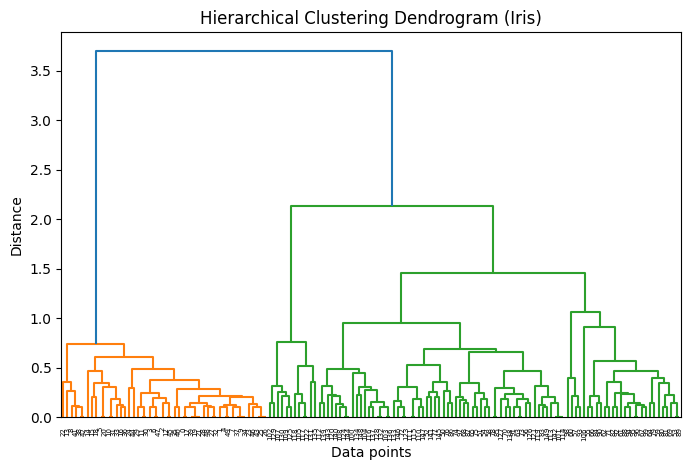

In [16]:
plt.figure(figsize=(8, 5))
dendrogram(z)
plt.title("Hierarchical Clustering Dendrogram (Iris)")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()


In [17]:
cluster = fcluster(z,t=3, criterion='maxclust')
cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [28]:
df["cluster"] = cluster
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_encoded,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,3
146,6.3,2.5,5.0,1.9,2,3
147,6.5,3.0,5.2,2.0,2,3
148,6.2,3.4,5.4,2.3,2,3


In [32]:
import joblib
joblib.dump(hc_model, "hierarchical_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("MOdel DUmped successfully...")


MOdel DUmped successfully...
